In [2]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import math
import re
import os
import seaborn as sbn
sbn.set_style("whitegrid")

import matplotlib.image as mpimg

from PIL import Image
import glob

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [15]:
def load_image(image):
    #each image is loaded --> resize --> vectorize --> store into a matrix T
    starter = Image.open(image)
    im_resize = resize_image(starter)
    #im_vector = vectorize_image(im_resize)
    #create a column vector
    #im_vector = im_vector.reshape((im_vector.size,1))
    #store into a big matrix
    #return im_vector
    return im_resize
        
def resize_image(image):
    #resize by a factor 16
    im_resize = image.resize(((image.size[0]/4),(image.size[1]/4)))
    return im_resize

def vectorize_image(image):
    #convert teh image into an array
    im_arr = np.array(image)
    im_flat = im_arr.ravel()
    
    return im_flat


In [17]:
#store images path
im_paths = []
counter = 0 
for root,dirs,files in os.walk(os.getcwd()):
    #find all the file images
    #if pgm is teh extension and ambient is not in the name
    for f in files:
        if "pgm" in f:
            if "Ambient" in f:
                continue
            else:
                #create the path
                im_path = root + "/" + f
                im_paths.append(im_path)
                

im = Image.open(im_paths[0]).convert("L")
# get original dimensions
H,W = np.shape(im)[0]/4,np.shape(im)[1]/4
print 'shape=',(H,W)

im_number = len(im_paths)
# fill array with rows as image
# and columns as pixels
arr = np.zeros([im_number,H*W])

for i in range(im_number):
    im = Image.open(im_paths[i]).convert("L")
    im_resize = resize_image(im)
    arr[i,:] = np.reshape(np.asarray(im_resize),[1,H*W])




shape= (48, 42)


(2016,)
(2432, 2016)
2432


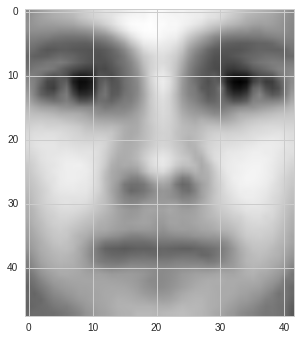

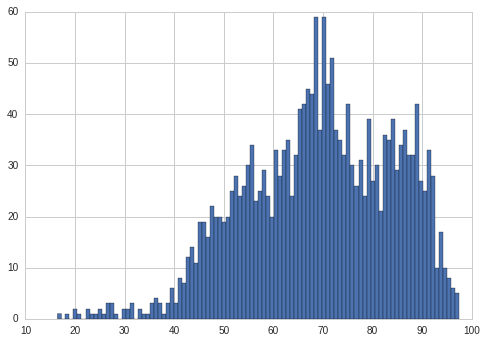

In [18]:
# let's find the mean_image
mean_image = np.mean(arr, axis=0)
print(mean_image.shape)
print(arr.shape)
print(len(im_paths))
plt.imshow(np.reshape(mean_image,[H,W]), cmap = plt.get_cmap("gray"))
plt.figure()
plt.hist(mean_image,bins=100);



In [19]:
# centering the data (subtract mean face)
arr_norm = np.zeros([im_number, H*W])
arr_norm = arr - mean_image



[ -9.85608553   1.60238487  -1.24013158 ..., -19.30222039 -23.75534539
 -33.97450658]


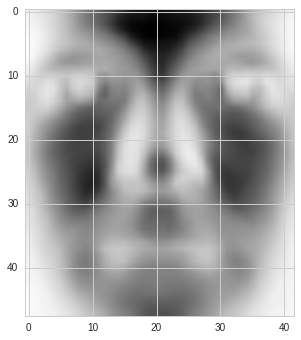

In [20]:

from sklearn.decomposition.pca import PCA

print(arr_norm[0])
pca = PCA()
pca.fit(arr_norm)

# eigenfaces
eigenfaces = pca.components_
eigen = eigenfaces[:9,:]
plt.imshow(np.reshape(eigen[0,:],[H,W]))

In [22]:
print(eigenfaces.shape)

(2016, 2016)


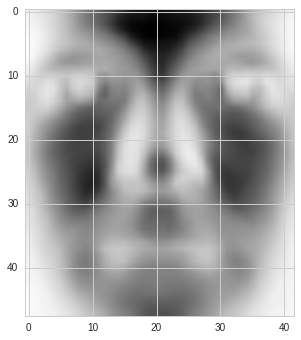

In [23]:
plt.imshow(np.reshape(eigenfaces[:9,:][0],[48,42]))
#fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))